# Computer Vision - Assignment 2 - Deep Learning for Computer Vision

#### 10 points   |   Due date: November 26, 23:59   |   Submission site: https://pradogrado2324.ugr.es/

### Student's Full Name: <mark>ALEJANDRO NIETO ALARCÓN</mark>

The goal of this assignment is to learn how to implement and use Convolutional Neural Networks using the fastai library (https://docs.fast.ai/).

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
Mounted at /content/gdrive
fastcore version 1.5.29 installed
fastai version 2.7.13 installed


In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3.5 points)**
<font color='blue'>In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

<font color='blue'>We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the fastai Model repository. You have to compare the performance of the following models and training strategies:

<font color='blue'>1. Use ResNet18 as a feature extractor for the Caltech-UCSD Birds-200-2011 dataset under three different scenarios:

>  <font color='blue'>1.1. Remove the final fully-connected (FC) layer of ResNet18, replace it by a FC layer of the dimensionality of the new problem, and train the new weights of this FC layer (while keeping frozen the remaining weights in the network).

> <font color='blue'>1.2. Instead of a single FC layer, employ the head introduced by default in fastai (see https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw and https://docs.fast.ai/vision.learner.html#head-and-model). Train these new weights (while keeping frozen the remaining weights in the network).

> <font color='blue'>1.3. Create your own head, combining all types of blocks you want (convolutional, FC layers,...). Train all these new weights (while keeping frozen the remaining weight in the network).

<font color='blue'>2. Make a fine-tuning of the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be small.

<font color='blue'>3. Train from scratch the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be VERY small.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 59 60 60 60 60 60 60 60 60 60 60 59 59 60 60 60 59 59 60 41 60 60 60 60 59 44 59 45 60 60 60 59 60 60 60 60 60 60 60 53 60 60 60 60 60 60 60 60 60 60 59 60 60 60 60 60 60 60 60 60 60 60 60 53 56 59 60 58 60 60 60 60 60 60 58 60 59 59 60 53 60 60 60 58 60 60 60 59 60 60 60 59 60 60 60 48 50 60 50 59 59 60 60 60 60 60 59 60 60 60 60 60 60 60 60 59 60 58 60 59 59 56 60 60 59 60 60 59 60 60 60 60 60 60 60 58 59 60 60 60 60 60 59 60 60 60 60 60 50 58 50 59 60 60 60 59 60 60 60 57 60 60 60 60 60 60 59 59 60 49 60 60 57 56 60 60 60 51 60 60 60 60 52 59 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 

In [ ]:
# Now we have in images_list the list with all the images, and in train_test_split which ones belong to training (1) or test (0)
# We are going to create two folders: one train and another test, and we are going to put the corresponding images inside
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/122.Harris_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/097.Orchard_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/140.Summer_Tanager'), Path('/root/.fastai/data/CUB_200_2011/train/092.Nighthawk'), Path('/root/.fastai/data/CUB_200_2011/train/108.White_necked_Raven'), Path('/root/.fastai/data/CUB_200_2011/train/070.Green_Violetear'), Path('/root/.fastai/data/CUB_200_2011/train/057.Rose_breasted_Grosbeak'), Path('/root/.fastai/data/CUB_200_2011/train/030.Fish_Crow'), Path('/root/.fastai/data/CUB_200_2011/train/042.Vermilion_Flycatcher'), Path('/root/.fastai/data/CUB_200_2011/train/137.Cliff_Swallow'), Path('/root/.fastai/data/CUB_200_2011/train/163.Cape_May_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/089.Hooded_Merganser'), Path('/root/.fastai/data/CUB_200_2011/train/019.Gray_Catbird'), Path('/root/.fastai/data/CUB_200_2011/train/033.Yellow_billed_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/180.Wilson_Warb

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


Este Datablock será comun para el resto del ejercicio lo que quiere decir que todas las redes que implementemos usarán esta forma para cargar los datos para que podamos ver realmente como funciona la red a través de los cambios que nosotros mismos hagamos.

* item_tfms=Resize(460): Esto es una transformación a nivel de elemento y se aplica a cada imagen individual antes de que se forme un lote. En este caso, todas las imágenes se redimensionan a un tamaño de 460 píxeles antes de ser agregadas al lote. Este tamaño más grande puede ayudar a capturar detalles más finos en las imágenes. Este tamaño de 460 es uno que tras prueba y error me dio buenos resultados.

* batch_tfms=[*aug_transforms(size=224, max_warp=0)]: Estas son transformaciones a nivel de lote que se aplican después de formar un lote de imágenes redimensionadas. El tamaño del lote es probablemente más pequeño que el tamaño redimensionado para ahorrar memoria y acelerar el procesamiento. Además, las transformaciones de aumento de datos se aplican aquí, y estas transformaciones suelen ser más efectivas cuando se aplican a imágenes más pequeñas.

En resumen, item_tfms redimensiona cada imagen a un tamaño más grande antes de formar un lote, y luego batch_tfms aplica transformaciones adicionales a nivel de lote, incluido el ajuste de tamaño a un valor más pequeño, lo que ayuda a mejorar la eficiencia del procesamiento y permite aplicar aumentos de datos de manera más efectiva.

Tambien cabe destacar que usaremos un tamaño de batch de 32 imagenes.

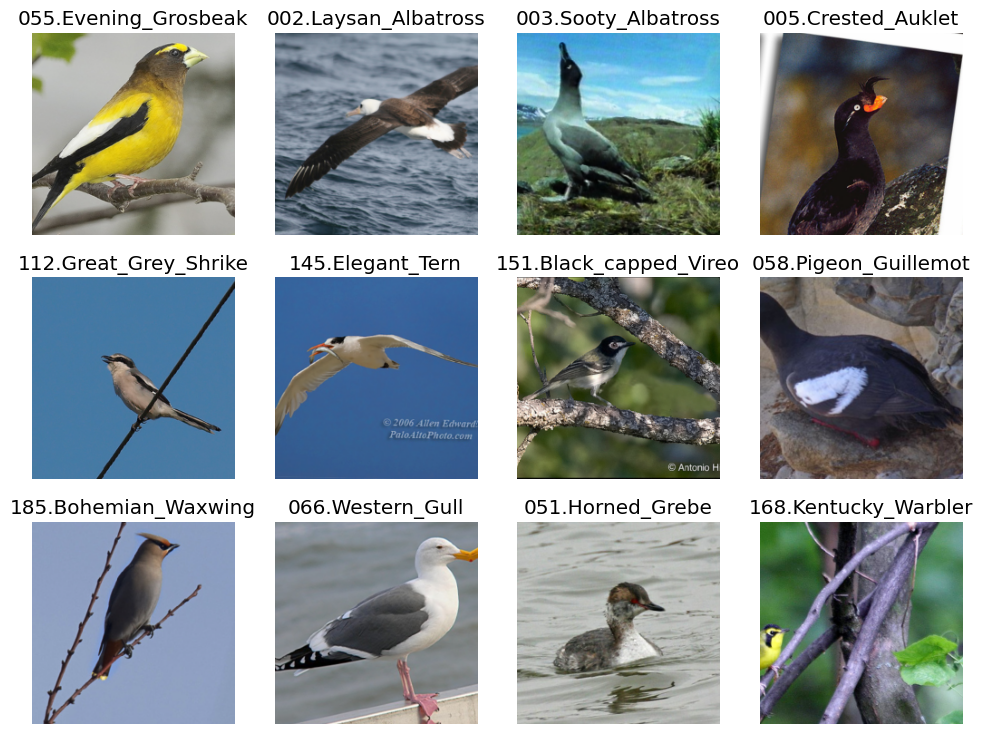

In [ ]:

dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2, seed=42),
                     get_y=parent_label,
                     item_tfms=Resize(460),
                     batch_tfms=[*aug_transforms(size=224, max_warp=0)])

dls = dls.dataloaders(path/'train', bs = 32)
dls.show_batch(max_n=12)



## <font color='blue'> 3.1.1 Train single FC layer included in the head

En apartado lo que debemos de hacer es cambiar el head de la red RESNET18 por una nueva head creada por nosotros mismos que sera una capa FC que crearemos.

El objeto Learner lo crearemos con la funcion "vision_learner" esta función de fastai nos hace por defecto varias cosas como por ejemplo si le pasamos el custom_head nuestra nueva cabeza esta corta automaticamente la head anterior del modelo de red que le pasemos. Si por defecto no le pasamos ninguna añade la head por defecto de fastai. Tenemos que tener bastante cuidado con este tipo de funciones ya que realizan muchas cosas por dentro.

Por ello tambien hemos escogido para entrenar el modelo la funcion fit_one_cycle en lugar de fine_tune ya que fine_tune es una funcion que usa fit_one_cycle en dos etapas, una primera en la que en un numero de épocas (por defecto 1) hace un freeze de los pesos de la red y la segunda etapa donde hace el unfreeze y comienza a modificar los pesos de la red al completo. Esto no nos interesa en este apartado ya que lo que queremos es mantener el freeze de toda la red mientras entrenamos y solo cambiar los pesos del nuevo head que hemos implementado siendo fit_one_cycle una mejor manera de controlarlo.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 157MB/s]


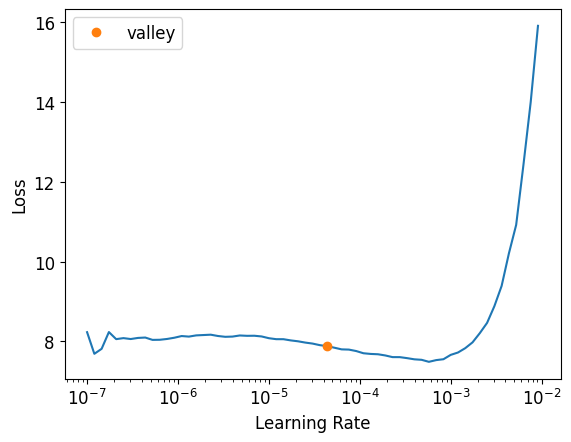

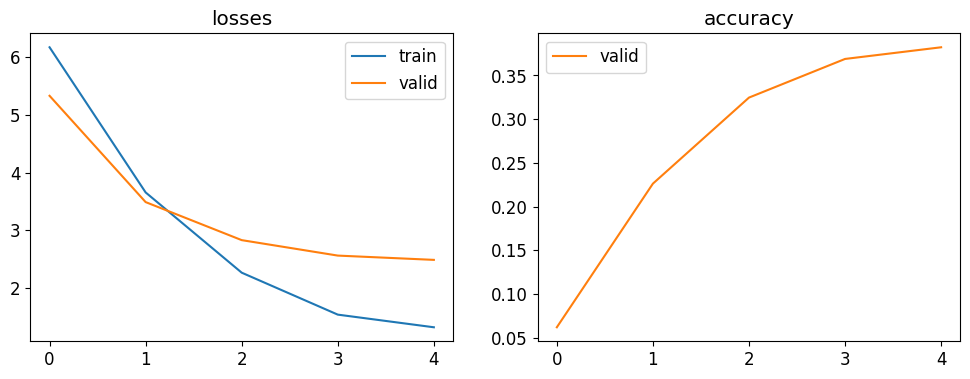

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

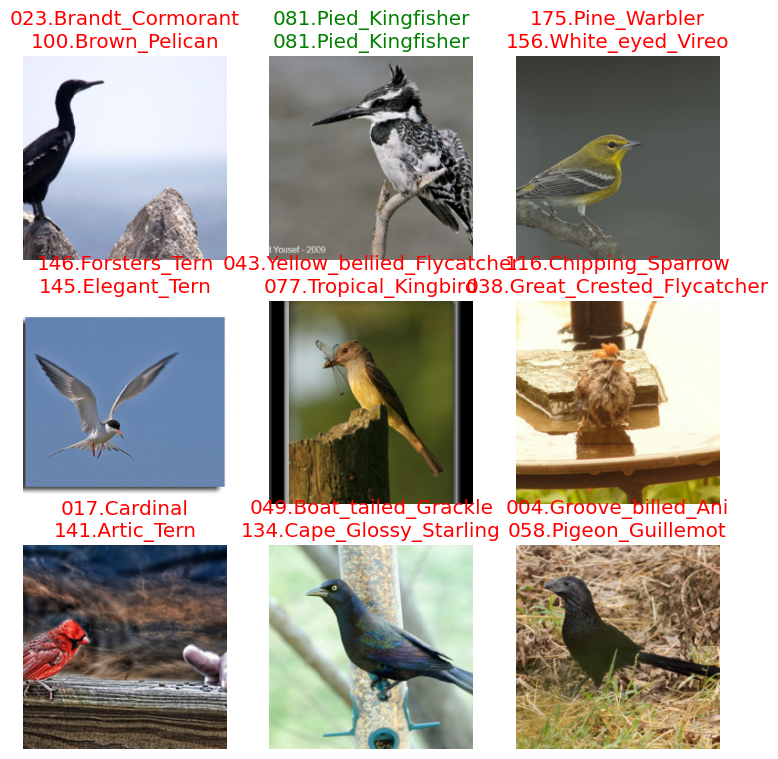

In [ ]:
# Número total de clases de salida
num_classes = len(dls.vocab)

# Nueva head a ser puesta en la red RESNET18
new_head = nn.Sequential(
    Flatten(),
    nn.Linear(25088, num_classes)
)

# Creamos el nuevo modelo que parte de la red resnet18 y le añadimos nuestra head
learn = vision_learner(dls, models.resnet18, custom_head = new_head, metrics=accuracy, pretrained= True)

# Hacemos freeze de los valores de la red para que solo cambien los pesos en el head
learn.freeze()


lr_seq = learn.lr_find()

learn.fit_one_cycle(5, lr_max = lr_seq[0])

learn.recorder.plot_metrics()
learn.show_results()
learn.summary()

Si vemos la tabla de "losses" podemos ver que tras 5 épocas el modelo aun tiene un margen de mejora ya que la loss de validación podria caer más hacia el de train por lo cuál podriamos dejarlo más épocas para que intentase mejorar. (Aunque tambien se ve como empiezan a estancarse los valores por lo que puede que no mejore mucho y después pueda caer en un overfitting)

In [ ]:
test_dl = learn.dls.test_dl(files_test,with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, 5, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
41.38764238867794


Con esta red obtenemos un buen accuracy para lo sencilla que es el head que hemos añadido por lo cual no esta nada mal. Podría mejorar bastante si el dataset estuviese formado por más imagenes.

## <font color='blue'> 3.1.2 Train head included by default in fastai

En este apartado queremos añadir el head por defecto de fastai por lo cual como he dicho anteriormente llamaremos a la función vision_learner la cual se encargará de hacer un cut del head de la red resnet18 y añadir la de por defecto de fastai.

El resto del código será el mismo.

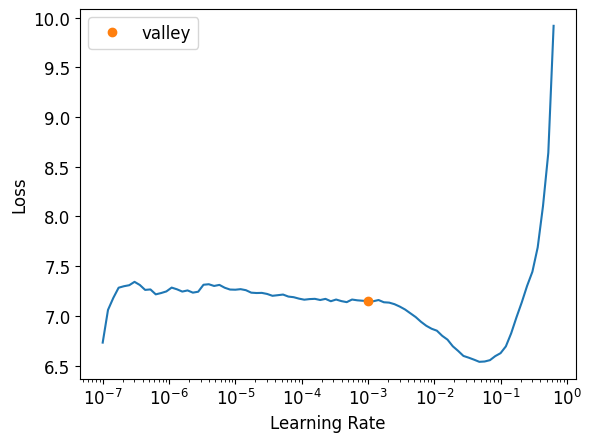

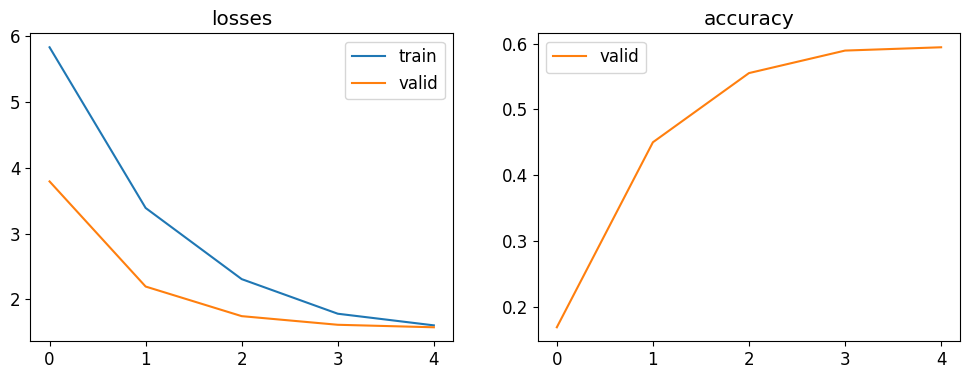

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

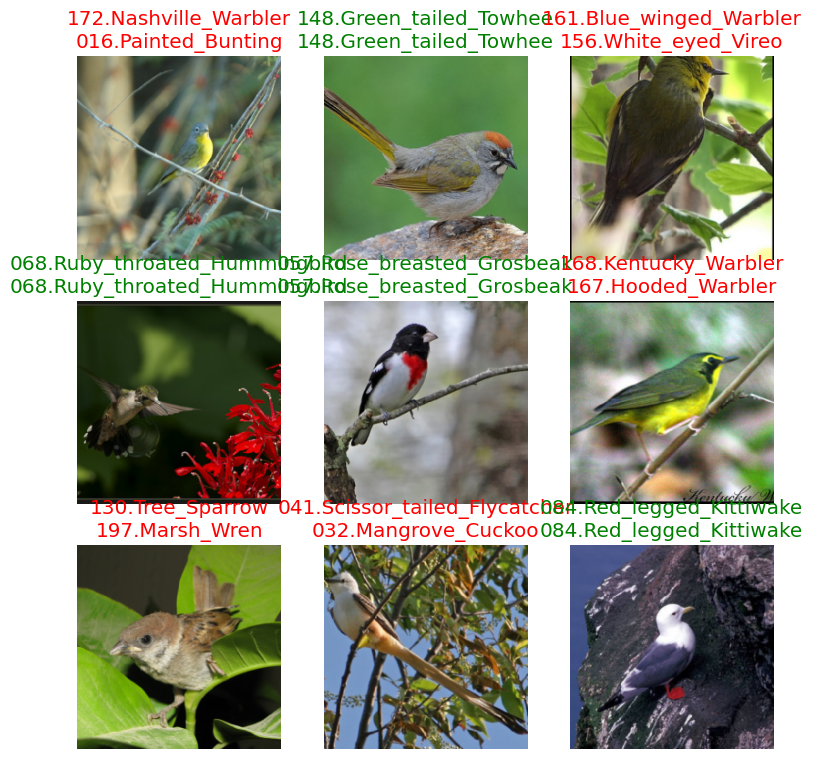

In [ ]:
num_classes = len(dls.vocab)


learn = vision_learner(dls, models.resnet18, metrics=accuracy, pretrained = True)


#Hacemos freeze de los valores de la red
learn.freeze()

lr_seq = learn.lr_find()

learn.fit_one_cycle(5, lr_max = lr_seq[0])

learn.recorder.plot_metrics()
learn.show_results()
learn.summary()


En este caso el modelo de head por defecto de fastai es bastante más sofisticado que el simple head que hemos hecho nosotros incluyendo mas capas de todo tipo y debido a esto siendo este capaz de capturar una complejidad mayor en la red que deberia conllevar a obtener mejores resultados que en el apartado anterior. Aún asi tenemos muy pocas imágenes (casi 6000) para entrenar una red con muchos parámetros por lo que podemos ver en el grafico de loss que sobre todo en las primeras epocas le cuesta aprender ya que que la linea de loss de validación se encuentra por debajo de la de train. Esta red es más potente pero los datos no son suficientes para que esta aprenda de una manera correcta.

In [ ]:
test_dl = learn.dls.test_dl(files_test,with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, 5, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
60.148429409734206


Aún con el problema anterior obtenemos un mejor accuracy que en el anterior apartado (3.1.1) con lo cual vemos que efectivamente al ser más potente el head y capturar más complejidad somos capaces de obtener mejores resultados.

## <font color='blue'> 3.1.3. Train new custom head (including convolutional layers, FC layers, etc.)

En este apartado nos encargaremos nosotros mismos de hacer un head y debido a lo que hemos visto a lo anterior (3.1.1 head muy simple) (3.1.2 head muy sofisticado) lo mejor debido a la cantidad de datos que tenemos quizás sea algo más sencillo que el 3.1.2 para que pueda aprender más rápido con los datos que tenemos por ello he hecho el siguiente head que se puede asemejar al head por defecto de fastai pero que claramente no tiene ni tantas capas ni parametros como esta.

Las capas nuevas añadidas que no había usado en la parte 2 por ejemplo, son:

 1. **nn.AdaptiveAvgPool2d(1)**: Capa de pooling adaptativo que realiza un promedio adaptativo global sobre la salida de la capa anterior. Su proposito es reducir el tamaño espacial de la salida a un tamaño fijo (en este caso, un solo píxel) independientemente de las dimensiones de entrada. Es útil para convertir características de diferentes tamaños espaciales en una representación unificada.

 2. **nn.BatchNorm1d(256)**: Aplica normalización por lotes a lo largo de la dimensión de características. Su funcion es estabilizar y acelerar el entrenamiento al normalizar las activaciones en cada mini-lote. Puede mejorar la convergencia y la generalización del modelo.

 3. **nn.Dropout(0.2)**: Aplica dropout con una probabilidad de 0.2 durante el entrenamiento. Su funcion es ayudar a prevenir el sobreajuste al "apagar" aleatoriamente un porcentaje de las unidades (neuronas) durante el entrenamiento. Esto puede mejorar la generalización del modelo.

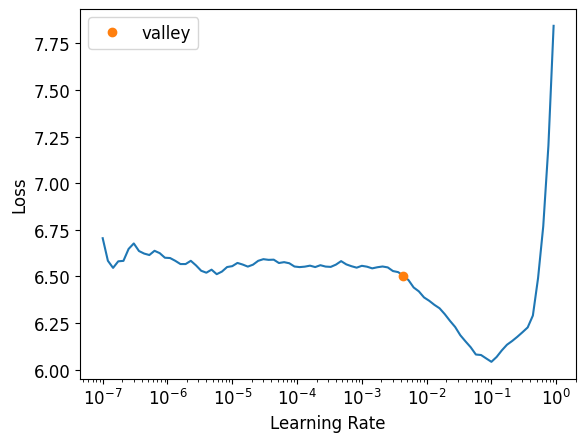

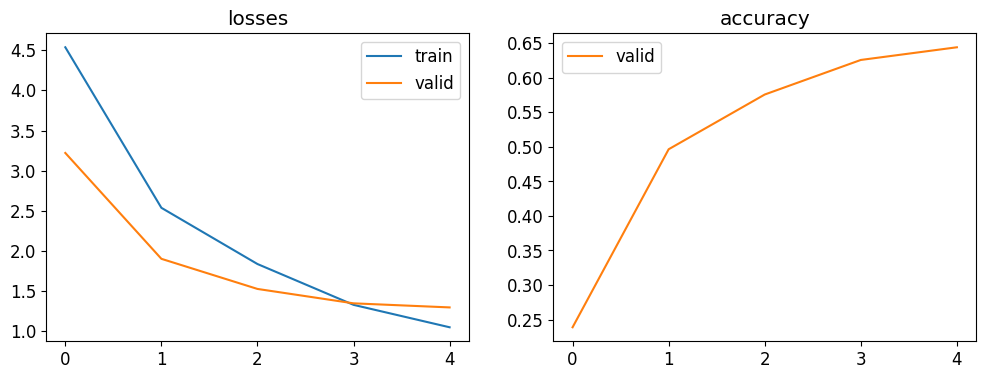

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

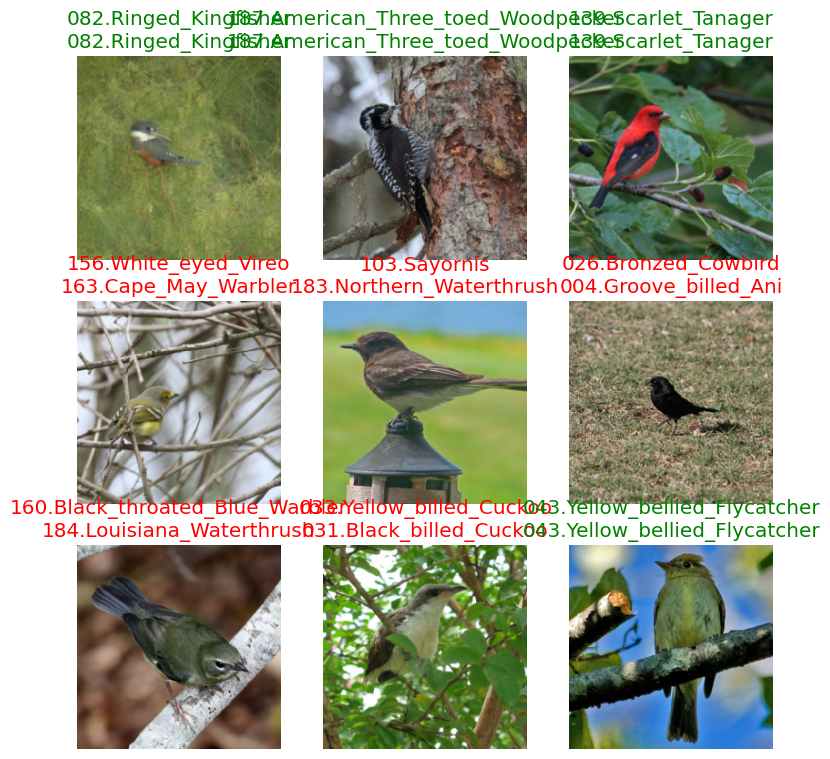

In [ ]:

num_classes = len(dls.vocab)
new_head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Dropout(0.2),  # Añadir dropout para regularización
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),  # Batch normalization para estabilizar el entrenamiento
    nn.Dropout(0.2),  # Añadir otro dropout
    nn.Linear(256, num_classes)
)

learn = vision_learner(dls, models.resnet18, metrics=accuracy, custom_head = new_head, pretrained = True)

learn.freeze()

lr_seq = learn.lr_find()

learn.fit_one_cycle(5, lr_max = lr_seq[0])

learn.recorder.plot_metrics()
learn.show_results()
learn.summary()


De esta forma aún siendo más sencillo el head vemos que en la gráfica de loss encontramos el mismo problema que al implementar el head por defecto de fastai. Aún así somos capaces de obtener mejores resultados ya que la red al ser más sencilla es capaz de aprender más.

In [ ]:
test_dl = learn.dls.test_dl(files_test,with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, 5, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
66.01656886434243


Obtenemos un mejor accuracy que usando la cabecera por defecto de fastai lo que nos dice que ahora con esta head somos capaces de aprender un poco mejor.

## <font color='blue'> 3.2. Fine-tuning of all ResNet18 (including the suitable FC layer as output/head)

En este apartado lo que haremos será coger el modelo que creamos en el apartado 3.1.1 y haremos fine-tuning de toda la red. Esto basicamente se traduce en que ahora ya no hace falta que congelemos los parametros de la red resnet18 y no los modifiquemos, ahora si podemos modificarlos y eso es lo que haremos. Quitamos la linea del freeze y llamamos para entrenar a fine_tune (que tiene como hemos dicho anteriormente 2 etapas una en la que hace freeze por defecto 1 época y otra etapa en la que hace unfreeze)

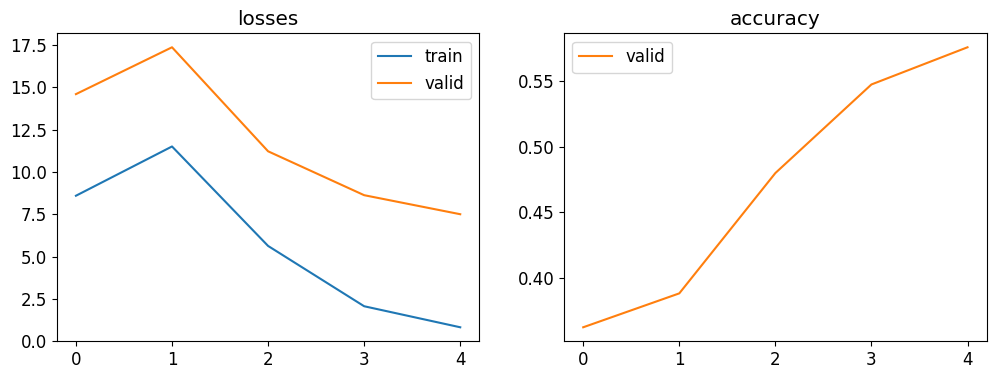

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

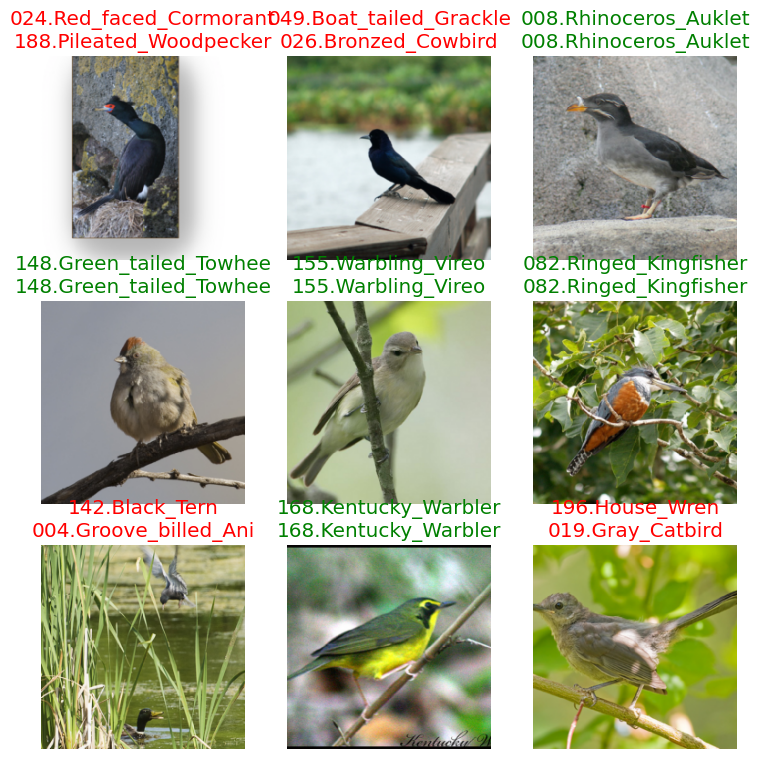

In [ ]:
num_classes = len(dls.vocab)
new_head = nn.Sequential(
    Flatten(),
    nn.Linear(25088, num_classes)
)

learn = vision_learner(dls, models.resnet18, custom_head = new_head, metrics=accuracy, pretrained= True)

learn.fine_tune(5)


learn.recorder.plot_metrics()
learn.show_results()
learn.summary()


De esta forma en la gráfica de loss podemos ver que tenemos muchisimo margen de mejora si dejasemos más epocas para aprender esta red y que obtendriamos muy buenos resultados ya que ambas pendientes de loss van en caida. Aun así debido a los pocos datos y epocas el resultado de esta red para el entrenamiento esta bastante bien (mejora a la red creada en el aptdo 3.1.1 solo con hacer fine_tuning de toda la red)

In [ ]:
test_dl = learn.dls.test_dl(files_test,with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, 5, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
59.354504659993104


Como vemos y he dicho anteriormente obtiene un mejor resultado que la red creada en el 3.1.1 y solo haciendo fine-tuning!

## <font color='blue'>  3.3. Train from scratch the entire ResNet18 (including the suitable FC layer as output/head)

En este apartado lo que haremos será entrenar la red por completo desde 0 con nuestro dataset por ello al vision_learner le decimos que queremos el modelo de resnet18 pero que no este preentrenado (pretrained = False). La verdad que desde el principio y viendo esto y los pocos datos que tenemos es muy dificil que aprenda la red de forma correcta ya que tiene muchisimos parametros que deberá de aprender solo con casi 6000 imágenes.

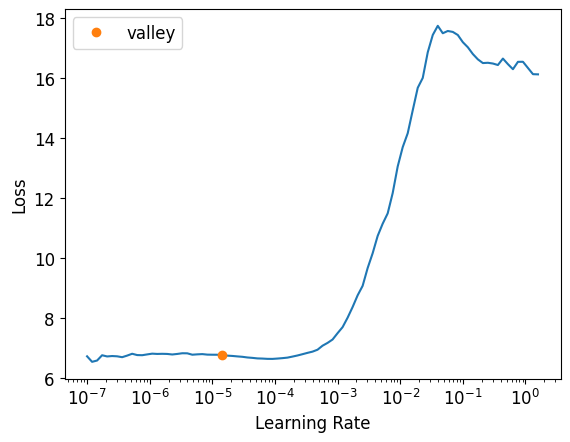

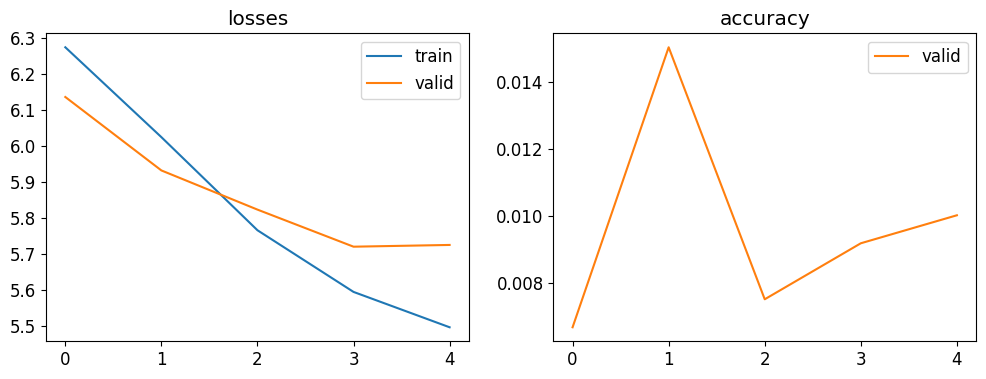

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

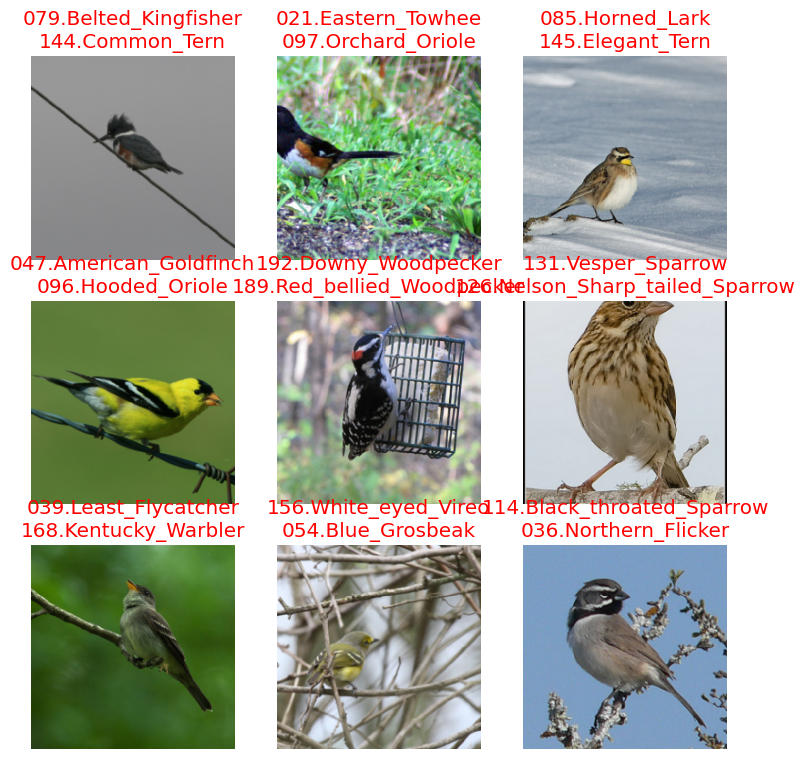

In [ ]:
num_classes = len(dls.vocab)
new_head = nn.Sequential(
    Flatten(),
    nn.Linear(25088, num_classes)
)

learn = vision_learner(dls, models.resnet18, custom_head = new_head, metrics=accuracy, pretrained= False)

lr_seq = learn.lr_find()

learn.fit_one_cycle(5, lr_max = lr_seq[0])

learn.recorder.plot_metrics()
learn.show_results()
learn.summary()



Podemos ver que en base a los resultados el accuracy durante todas las épocas es muy pobre y que practicamente no ha aprendido nada ya que es muy dificil entrenar todos los parametros de la red con tan pocas epocas y con tan pocas imágenes

In [ ]:
test_dl = learn.dls.test_dl(files_test,with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, 5, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
1.8639972385226096


Obtenemos un accuracy muy pobre acorde a la hipótesis que teniamos al principio de que esta red iba a ser muy mala por el simple hecho de que tiene muchisimos parámetros y es completamente impensable en poder entrenarlos en 5 etapas y con las imágenes que tenemos.